此项作业采用的是红酒数据

In [3]:
import os
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from efficient_apriori import apriori

In [4]:
#索引集合
index_list=['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']

country:红酒的产地（国家）
description：对红酒的描述（通常是一句话）
designation：红酒酿酒厂内的葡萄园
points：WineEnthusiast对葡萄酒的评分为1-100
price：一瓶红酒的价格
province：红酒产地（省）
region_1：省或州的葡萄种植区
region_2：有时在葡萄酒种植区域内有更具体的区域
variety：于酿造葡萄酒的葡萄种类
winery：酿酒厂名称

此为红酒数据的全部属性

In [5]:
#读入文件
df = pd.read_csv(os.path.dirname(os.getcwd()) + '\diggout\wine\winemag-data_first150k.csv', encoding='utf-8')[index_list]

In [6]:
#df = df[['points', 'price']]

In [7]:
#构建处理集合
transactions = [ tuple(x) for x in df.dropna(inplace=False).values.tolist()]

In [8]:
#查看处理集合前三行内容
print(transactions[:3])

[('US', 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.', "Martha's Vineyard", 96, 235.0, 'California', 'Napa Valley', 'Napa', 'Cabernet Sauvignon', 'Heitz'), ('US', 'Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.', 'Special Selected Late Harvest', 96, 90.0, 'California', 'Knights Valley', 'Sonoma', 'Sauvignon Blanc', 'Macauley'), ('US', "This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyard

In [9]:
#进行关联规则挖掘
itemsets, rules = apriori(transactions, min_support = 0.2, min_confidence = 0.6)

对数据进行关联规则挖掘，最小支持度为0.2，最小置信度为0.6

In [10]:
#打印频繁项集
print(itemsets)

{1: {('California',): 28557, ('Central Coast',): 9150, ('US',): 39241}, 2: {('California', 'Central Coast'): 9150, ('California', 'US'): 28557, ('Central Coast', 'US'): 9150}, 3: {('California', 'Central Coast', 'US'): 9150}}


In [11]:
#打印关联规则
for rule in sorted(rules, key = lambda rule: rule.lift):
  print(rule)

{US} -> {California} (conf: 0.728, supp: 0.728, lift: 1.000, conv: 1.000)
{California} -> {US} (conf: 1.000, supp: 0.728, lift: 1.000, conv: 0.000)
{Central Coast} -> {US} (conf: 1.000, supp: 0.233, lift: 1.000, conv: 0.000)
{California, Central Coast} -> {US} (conf: 1.000, supp: 0.233, lift: 1.000, conv: 0.000)
{Central Coast} -> {California} (conf: 1.000, supp: 0.233, lift: 1.374, conv: 272266252.134)
{Central Coast, US} -> {California} (conf: 1.000, supp: 0.233, lift: 1.374, conv: 272266252.134)
{Central Coast} -> {California, US} (conf: 1.000, supp: 0.233, lift: 1.374, conv: 272266252.134)


规则评价指标一：lift，提升度，指标二：conviction,出错率
通过上述结果，我们可以得出对于美国（US）产地的红酒，大部分出自加州（California）
葡萄种植区为Central Coast，产自加州的红酒，一定是美国生产的，出错率为0

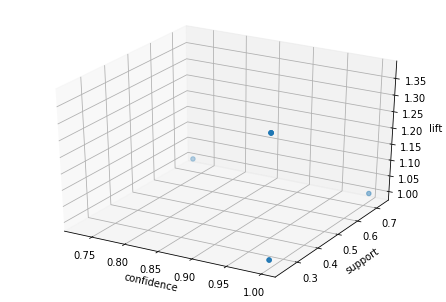

In [12]:
#对关联规则的支持度、置信度和提升度画散点图
x = [rule.confidence for rule in rules]
y = [rule.support for rule in rules]
z = [rule.lift for rule in rules]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)

ax.set_zlabel('lift')
ax.set_ylabel('support')
ax.set_xlabel('confidence')

plt.show()

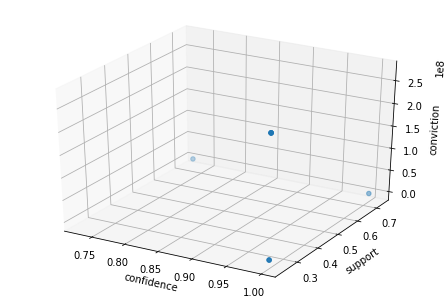

In [13]:
#对关联规则的支持度、置信度和出错率画散点图
x = [rule.confidence for rule in rules]
y = [rule.support for rule in rules]
z = [rule.conviction for rule in rules]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)

ax.set_zlabel('conviction')
ax.set_ylabel('support')
ax.set_xlabel('confidence')

plt.show()